# Unit-wget model trained on MPI and Era
# Filter contributions (viz via bubble plots)

## Southern California: storm 1a (2014 December 2–6, 2014), storm 1b (2014 December 11–12, etc.)
 
 





### Buble plots for ALL storm days

In [42]:
def bubble_plot(top15_filters_era, err1_list_era):
    # Plot
    ffii = 0
    for ff in top15_filters_era[0:15]:
        ffii += 1
        sizes = []
        for vv in range(18):
            xx = list(err1_list_era[ff])
            fvar = xx[1][vv]
            sizes.append(fvar*5000)
        plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],np.ones((18))*(16-ffii), s=sizes)
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], ['U8', 'V8', 'Q8', 'T7', 'Z7', 'Z5', 'U2', 'V2', 'pr', 'tx', 'tn', 'u', 'v', 'h', 'rs', 'or', 'ms', 'yd'])
    plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], ['15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1'])
    plt.legend([str(x) for x in top15_filters_era], bbox_to_anchor=(1.0, 1.05), title='Filter:')
    plt.show()
    

In [43]:
def plot_activation(top15_filters_era, input_chunk, bn_mean_era, gen):
    # front_encoded
    encoded_extreme = gen.encode(input_chunk)[0].detach()

    # diff
    diff = encoded_extreme - bn_mean_era
    print(diff.shape)
    
    fig, axarr = plt.subplots(1, 15, figsize = (20,20))
    #fig, axarr = plt.subplots(1, 15, figsize = (20,20), subplot_kw={'projection': ccrs.PlateCarree()})
    #lon = dv1[0].lon
    #lat = dv1[0].lat

    for ii in range(15):
        #axarr[ii].coastlines()
        #axarr[ii].add_feature(cfeature.STATES)
        #img_extent = (lon.min(), lon.max(), lat.min(), lat.max())
        
        plot = axarr[ii].imshow(diff[0,top15_filters_era[ii]].numpy()[:,::-1])
        axarr[ii].axis('off')
        axarr[ii].title.set_text(top15_filters_era[ii])
    plt.show()


In [44]:
def show_storm(ii, storms=storms, xoff=20, yoff=58):
    input_chunk = storms[ii:ii+1, :, yoff:yoff+64, xoff:xoff+64]

    # denorm
    input_img_denorm = input_chunk * (minmaxi_era[:,1]-minmaxi_era[:,0])[np.newaxis,:,np.newaxis,np.newaxis] + minmaxi_era[:,0][np.newaxis,:,np.newaxis,np.newaxis]
    raw_era = np.array(input_img_denorm)[0]
    raw_era[np.isnan(raw_era)] = 0.   # extended surface domain has nan's at bottom
    #raw_era[8:] = (raw_era * mask)[8:]

    # ^4 prec
    raw_era[8] = raw_era[8] ** 4

    vmin = [raw_era[ii].min() for ii in range(18)]
    vmax = [raw_era[ii].max() for ii in range(18)]

    svars = [0,1,2,3,4,5,6,7,17]
    plot_9v_192x256_abs(raw_era, None, vmin, vmax, svars=svars, xoff=xoff, yoff=yoff)
    svars = [8,9,10,11,12,13,14,15,16]
    plot_9v_192x256_abs(raw_era, None, vmin, vmax, svars=svars, xoff=xoff, yoff=yoff)


#### Global scale (over all storms)

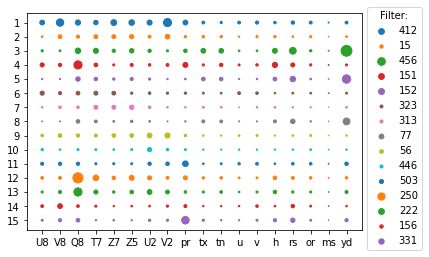

torch.Size([1, 512, 8, 8])


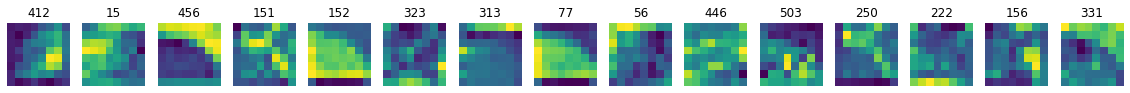

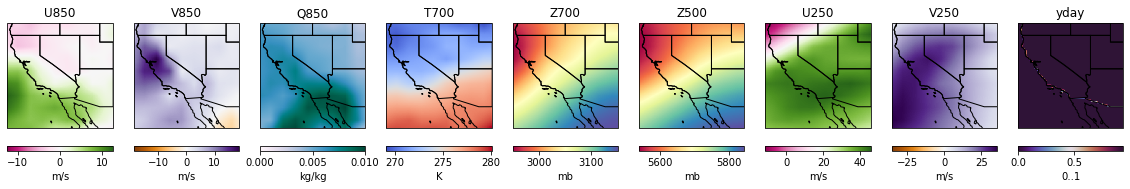

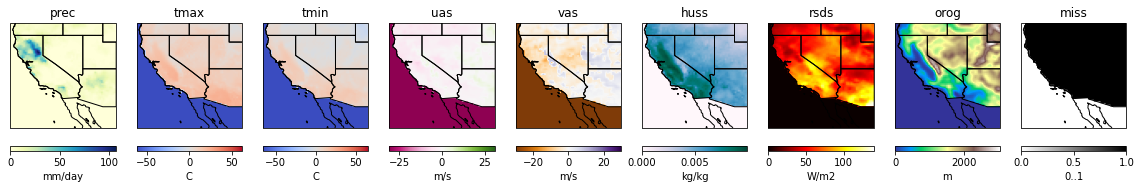

/glade/u/home/dkorytin/miniconda3/envs/na-cordex-zarr-jnb/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1648016052946/work/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1272.)
  


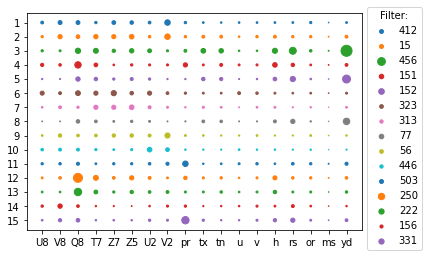

torch.Size([1, 512, 8, 8])


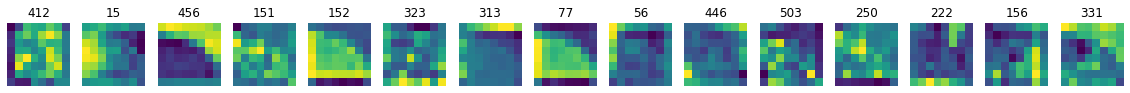

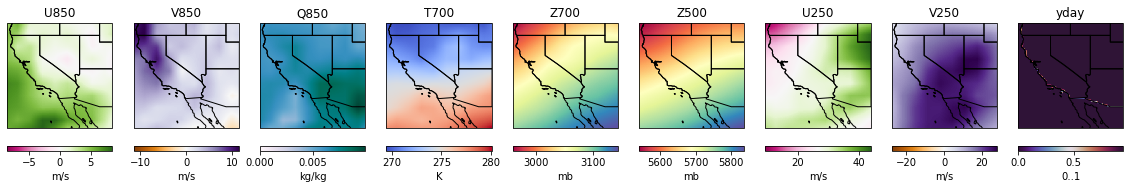

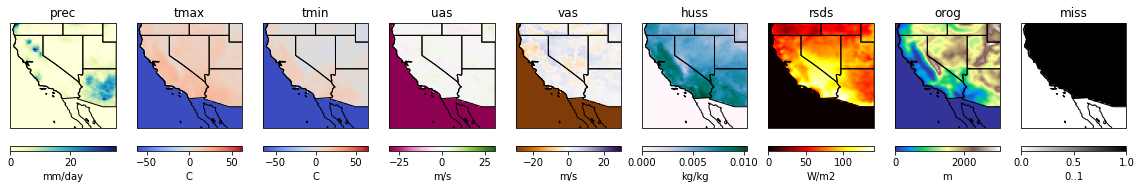

/glade/u/home/dkorytin/miniconda3/envs/na-cordex-zarr-jnb/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1648016052946/work/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1272.)
  


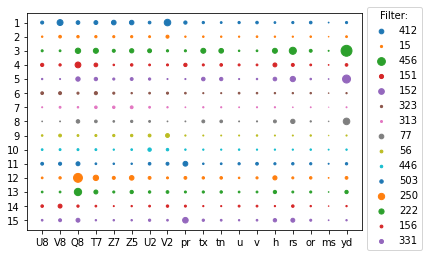

torch.Size([1, 512, 8, 8])


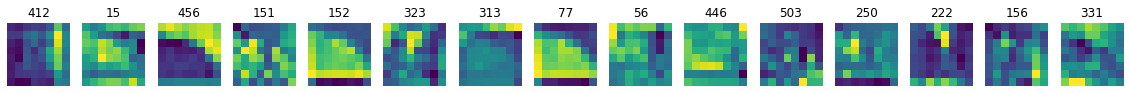

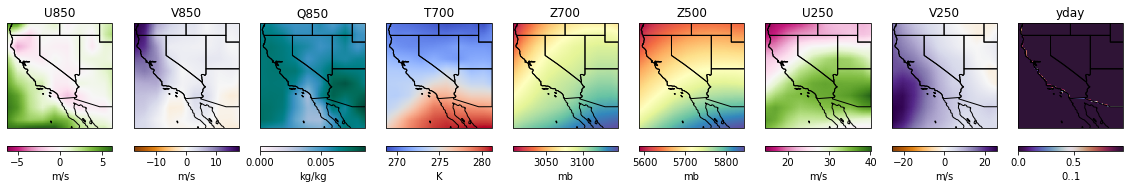

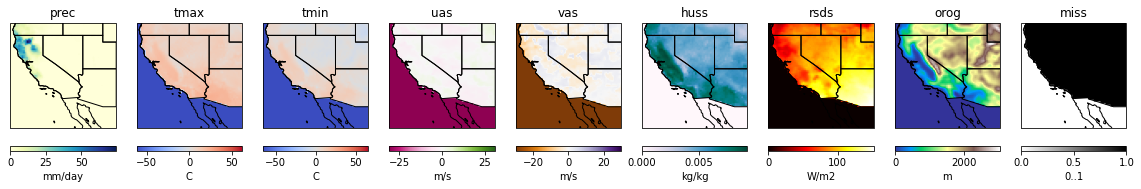

/glade/u/home/dkorytin/miniconda3/envs/na-cordex-zarr-jnb/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1648016052946/work/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1272.)
  


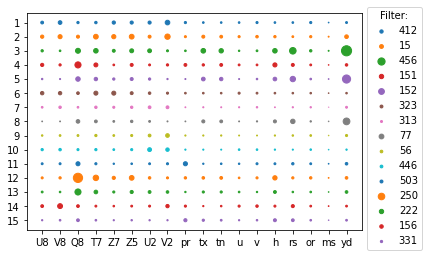

torch.Size([1, 512, 8, 8])


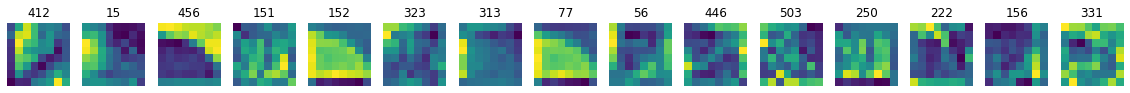

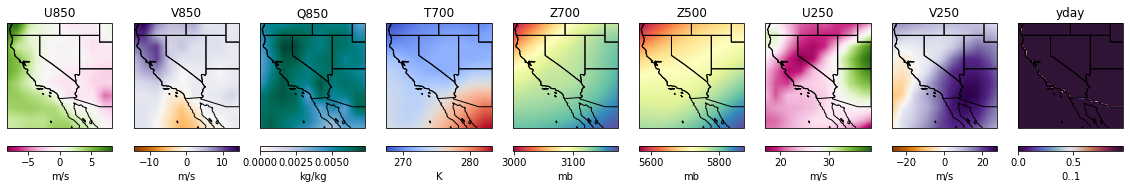

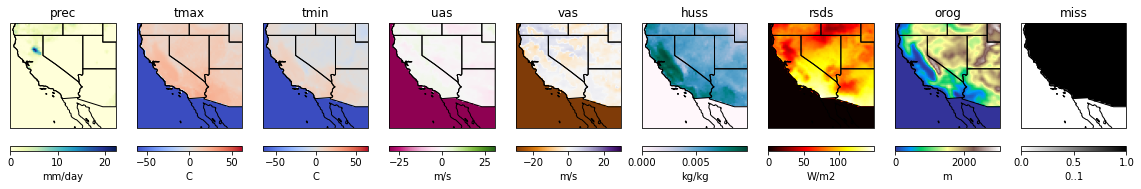

In [53]:
# storm indices: 0, 1, 2, 3, 4 
# storm1a (2014 December 2–6, 2014 (storm 1a) )
for ii in range(0,4+1):
    # ERA extreme day
    #input_chunk = storms[ii:ii+1, :, 58:58+64, 110:110+64]
    input_chunk = storms[ii:ii+1, :, 58:58+64, 20:20+64]

    input_chunk[np.isnan(input_chunk)] = 0.   # extended surface domain has nan's at bottom
    err1_list_era, err2_list_era = calc_err_list(input_chunk, bn_mean_era, gen_b)    
    
    # Plot
    bubble_plot(top15_filters_era, err1_list_era)
    
    plot_activation(top15_filters_era, input_chunk, bn_mean_era, gen_b)
    
    show_storm(ii)


/glade/u/home/dkorytin/miniconda3/envs/na-cordex-zarr-jnb/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1648016052946/work/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1272.)
  


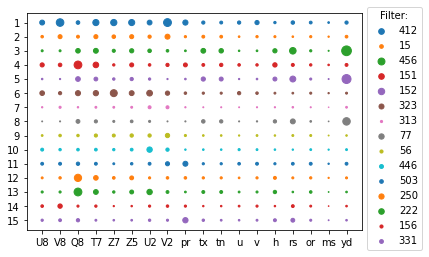

torch.Size([1, 512, 8, 8])


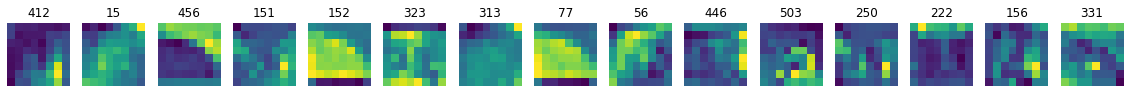

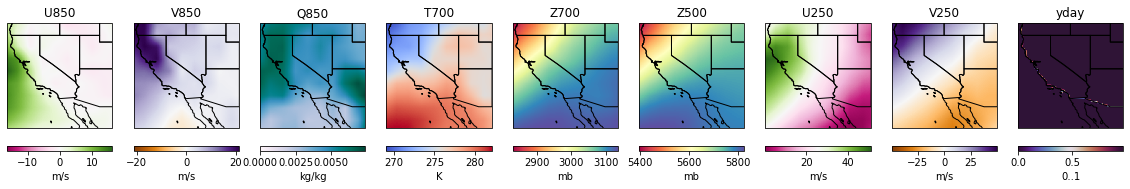

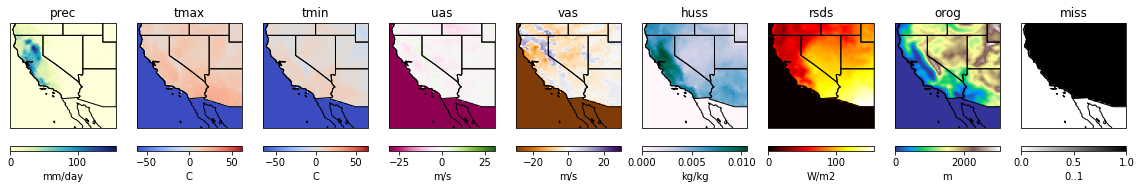

/glade/u/home/dkorytin/miniconda3/envs/na-cordex-zarr-jnb/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1648016052946/work/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1272.)
  


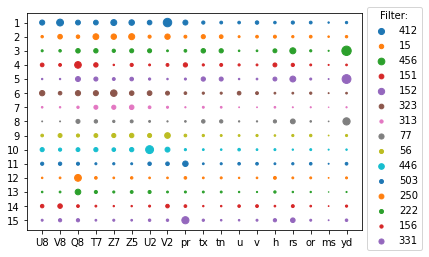

torch.Size([1, 512, 8, 8])


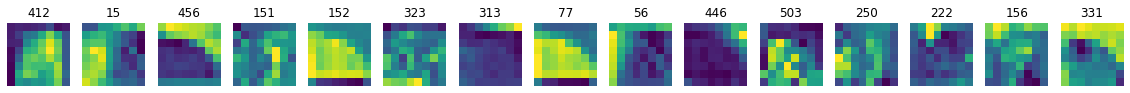

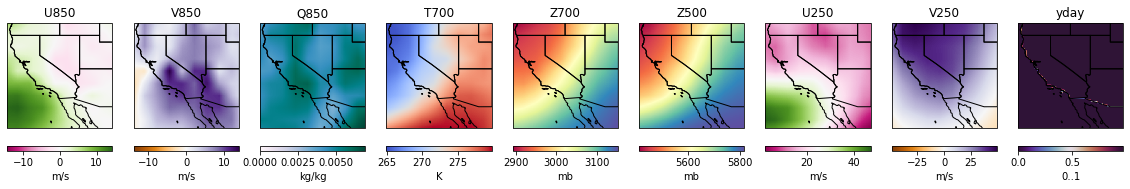

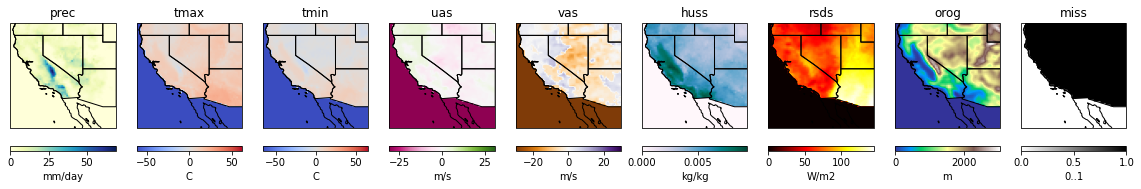

In [54]:
# storms indices: 5, 6
# storm1b (2014 December 11–12(storm 1b)
for ii in range(5,6+1):
    # ERA extreme day
    #input_chunk = storms[ii:ii+1, :, 58:58+64, 110:110+64]
    input_chunk = storms[ii:ii+1, :, 58:58+64, 20:20+64]
    
    input_chunk[np.isnan(input_chunk)] = 0.   # extended surface domain has nan's at bottom
    err1_list_era, err2_list_era = calc_err_list(input_chunk, bn_mean_era, gen_b)
        
    # Plot
    bubble_plot(top15_filters_era, err1_list_era)
    
    plot_activation(top15_filters_era, input_chunk, bn_mean_era, gen_b)
    
    show_storm(ii)
